One of the simplest models that can predict the fundamental free motion of a bicycle or motorcycle takes the following form:

$$
\mathbf{M\ddot{q}}
+v\mathbf{C}_1\mathbf{\dot{q}}
+\left[g\mathbf{K}_0
+v^2\mathbf{K}_2\right]\mathbf{q}
=0
$$

where

$$
\mathbf{q} =
[\phi \quad \delta]^T
$$

$\delta$, the steer angle, is a generalized coordinate that tracks the angle between the front frame (handlebar/fork) and the rear frame (frame, seat, etc) and $\phi$, the roll angle, is a generalized coordinate that tracks the roll angle of the rear frame relative to the ground. If each of these are zero the bicycle is standing upright and the steering is pointed straight ahead. Positive steer angle is to the right and negative steer angle is to the left. Positive roll is to the right and negative to the left.

The system has a mass matrix, $\mathbf{M}$, and effective damping and stiffness matrices, $\mathbf{C}=v\mathbf{C}_1$ and $\mathbf{K}=g\mathbf{K}_0 + v^2\mathbf{K}_2$, that are parameterized by the speed of the bicycle $v$ and the acceleration due to gravity $g$. These matrices are a function of the vehicle's geometry and mass distribution. Typical values for the four matrices in SI units are:

$$
\mathbf{M} =
\begin{bmatrix}
80.81722 & 2.31941332208709 \\
2.31941332208709 & 0.29784188199686
\end{bmatrix}
$$

$$
\mathbf{K}_0 =
\begin{bmatrix}
-80.95 & -2.599516 852 498 72 \\
-2.599516 852 498 72 & -0.803 294 884 586 18
\end{bmatrix}
$$

$$
\mathbf{K}_2 =
\begin{bmatrix}
0 & 76.597 345 895 732 22 \\
0 & 2.654 315 237 946 04
\end{bmatrix}
$$

$$
\mathbf{C}_1 =
\begin{bmatrix}
0 & 33.866 414 914 924 94 \\
-0.850 356 414 569 78 & 1.685 403 973 975 60
\end{bmatrix}
$$

The speed $v$ is in meters per second and $g$ is in meters per second squared.

In [1]:
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

# Eigenvalues and Eigenvectors

In the previous class we learned that the free response of the system can be formulated by solving an eigenvalue problem. This applies to systems with or without damping. All scientific computing software provides efficient numerical routines to compute the eigenvalues and eigenvectors of a square matrix. In Python you can use `numpy.linalg.eig`. For systems that have a general damping matric, this computation requires that the system be in state space form:

$$\dot{\mathbf{x}} = \mathbf{A} \mathbf{x}$$

where $\mathbf{x}$ is the state vector.

# Exercise

Write a function that takes the matrices $\mathbf{M,K_0, K_2, C_1}$, the speed, and gravity as an input and returns the A matrix.

In [2]:
def compute_state_matrix(v, g, M, C1, K0, K2):
    """Returns the state matrix.
    
    Parameters
    ----------
    v : float
        Bicycle speed in meters per second.
    g : float
        Acceleration due to gravity in meters per second squared.
    M : array_like, shape(2,2)
        The mass matrix.
    C1 : array_like, shape(2,2)
        The speed proportional damping matrix.
    K0 : array_like, shape(2,2)
        The gravity proportional stiffness matrix.
    K2 : array_like, shape(2,2)
        The speed squared proportional stiffness matrix.
    
    Returns
    -------

    As : ndarray, shape(n,4,4)
        The state matrices evaluated at each speed in `speeds`.

    Notes
    -----
    The second order equations of motion take this form:
    
    M * q'' + v * C1 * q' + [g * K0 + v**2 * K2] * q = 0
    
    where q = [roll angle,
               steer angle]
    
    The first order equations of motion take this form:
    
    x' = A * x + B * u
    
    where x = [roll angle,
               steer angle,
               roll rate,
               steer rate]

    """
    
    # write your code here
    
    invM = np.linalg.inv(M)
    
    # sub-matrices
    a11 = np.zeros((2, 2))
    a12 = np.eye(2)
    a21 = -invM @ (g * K0 + v**2 * K2)
    a22 = -invM @ (v * C1)

    # note that np.bmat returns a matrix but we don't want that! so make it an array
    A = np.array(np.bmat([[a11, a12], [a21, a22]]))

    return A

Now use the function to create a state matrix, $\mathbf{A}$, for $v=5.4 \textrm{m/s}$ and $g=9.81$. This speed is normal "around town" riding speed (12 mph).

In [3]:
M = np.array([[ 80.81722   ,   2.31941332],
              [  2.31941332,   0.29784188]])
C1 = np.array([[  0.        ,  33.86641391],
               [ -0.85035641,   1.68540397]])
K0 = np.array([[-80.95      ,  -2.59951685],
               [ -2.59951685,  -0.80329488]])
K2 = np.array([[  0.        ,  76.5973459 ],
               [  0.        ,   2.65431524]])

v = 5.4
g = 9.81

A = compute_state_matrix(v, g, M, C1, K0, K2)
A

array([[  0.    ,   0.    ,   1.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   1.    ],
       [  9.4898, -26.5588,  -0.5698,  -1.7848],
       [ 11.7195, -26.5865,  19.8547, -16.6583]])

Now compute the eigenvalues and eigenvectors of the the system using `numpy.linalg.eig`, see https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html.

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(A)

The eigenvalues are, in general, complex numbers. The complex eigenvalues come in complex conjugate pairs. Each pair corresponds to one osciallatory mode of motion. The real eigenvalues each correspond to one non-osciallatory mode of motion.

In [5]:
eigenvalues

array([ -0.1487+0.j    ,  -1.1037+5.0438j,  -1.1037-5.0438j, -14.8720+0.j    ])

In [6]:
eigenvectors

array([[  9.2967e-01+0.j    ,  -1.1363e-02-0.1127j,  -1.1363e-02+0.1127j,   5.1082e-06+0.j    ],
       [  3.3775e-01+0.j    ,  -3.2652e-02-0.1492j,  -3.2652e-02+0.1492j,  -6.7089e-02+0.j    ],
       [ -1.3825e-01+0.j    ,   5.8083e-01+0.067j ,   5.8083e-01-0.067j ,  -7.5969e-05+0.j    ],
       [ -5.0226e-02+0.j    ,   7.8866e-01+0.j    ,   7.8866e-01-0.j    ,   9.9775e-01+0.j    ]])

# Plot eigenvectors on polar plot

One way to visualize the modes of motion is by plotting phasor plots of each of the eigenvector components. Eigenvectors are made up of $n$ components, each which may be real or imaginary, that correspond to the states variables. In our case each each component is tied to the roll angle, steer angle, roll angular rate, and steer angular rate. It is also important to note that the phasor plot for osciallation (underdamped) of the derivative of one of the variables simply increases the magnitue by a factor $\omega_i$ and phase shifts the variable by $90^\circ$, i.e.:

$$
r_i(t) =  A_i e^{-\zeta_i \omega_i t} \sin(\omega_{di} t + \phi_i) \\
\dot{r}_i(t) =  \omega_{di} A_i e^{-\zeta_i \omega_i t} \cos(\omega_{di} t + \phi_i)
$$

This means that we only need to look at the components associated with the angles to see how the vehicle is moving.

A nice way to plot phasors that are using a polar plot. For example if I have an eigenvalue of $-1.2 + 6j$ that has an associated eigenvector of $[-0.011-0.123j, -0.032-0.149j, 0.581+ 0.067j, 0.789]$ then we can select the first two components and plot a line that is equivlanent to the magnitude of the component and at an angle based on the tangent of the imaginary over the real part.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

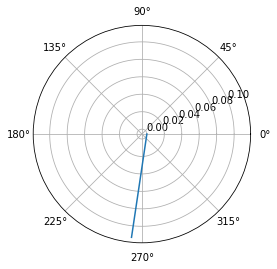

In [8]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'})

# this gets the first component of the second eigenvector
v = eigenvectors[0, 1]                                         

radius = np.abs(v)
theta = np.angle(v)

ax.plot([0, theta], [0, radius]);                                      

# Exercise

Make polar phasor plots for each of the eigenvalues.

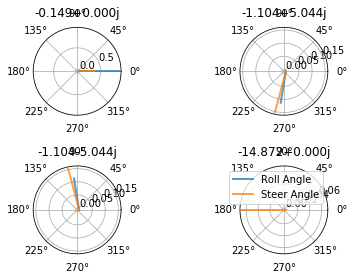

In [9]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'})

for i, ax in enumerate(axes.flatten()):
    e_val = eigenvalues[i]
    evec = eigenvectors[:, i]
    radius = np.abs(evec[0])
    theta = np.angle(evec[0])
    ax.plot([0, theta], [0, radius], linewidth=2, alpha=0.75)
    radius = np.abs(evec[1])
    theta = np.angle(evec[1])
    ax.plot([0, theta], [0, radius], linewidth=2, alpha=0.75)
    ax.set_title('{:1.3f}'.format(e_val))
ax.legend(['Roll Angle', 'Steer Angle'])
plt.tight_layout()

# Examine the Mode Shape Trajectories

For 5.4 m/s knowing that the two purely real eigenvalues represent overdamped behavior and the pair of imgarinary eigenvlues are 

In [10]:
def underdamped(e_val, initial, times):
    zeta_wn = -np.real(e_val)
    wd = np.abs(np.imag(e_val))
    
    r0_roll = initial[0]
    r0_steer = initial[1]
    r0d_roll = initial[2]
    r0d_steer = initial[3]
    
    # roll
    A = np.sqrt(((r0d_roll + zeta_wn * r0_roll)**2 + (r0_roll * wd)**2) / wd**2)
    phi = np.arctan2(r0_roll * wd, r0d_roll + zeta_wn * r0_roll)
    roll_traj = A * np.exp(-zeta_wn * times) * np.sin(wd * times + phi)
    
    #steer
    A = np.sqrt(((r0d_steer + zeta_wn * r0_steer)**2 + (r0_steer * wd)**2) / wd**2)
    phi = np.arctan2(r0_steer * wd, r0d_steer + zeta_wn * r0_steer)
    steer_traj = A * np.exp(-zeta_wn * times) * np.sin(wd * times + phi)

    return roll_traj, steer_traj

In [11]:
def overdamped(e_val, initial, times): 

    r0_roll = initial[0]
    r0_steer = initial[1]
    
    roll_traj = r0_roll * np.exp(np.real(e_val) * times)
    steer_traj = r0_steer * np.exp(np.real(e_val) * times)
    
    return roll_traj, steer_traj

# Mode 1: Non-oscillatory

The real part of the eigenvector components provide the initial conditions for that mode.

array([ 0.9297,  0.3377, -0.1382, -0.0502])

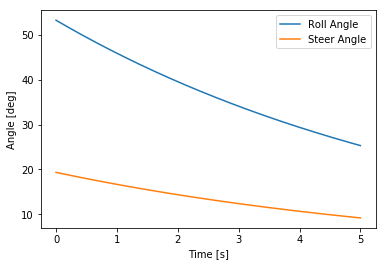

In [12]:
initial = np.real(eigenvectors[:, 0])

times = np.linspace(0, 5, num=1000)

roll_angle, steer_angle = overdamped(eigenvalues[0], initial, times)

plt.figure()
plt.plot(times, np.rad2deg(roll_angle), times, np.rad2deg(steer_angle))
plt.legend(['Roll Angle', 'Steer Angle'])
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]');

initial

# Mode 2: Osciallatory

The complex conjugate pair of imaginary eigenvalues represent one mode. We can use one as the initial condition.

array([-0.0114, -0.0327,  0.5808,  0.7887])

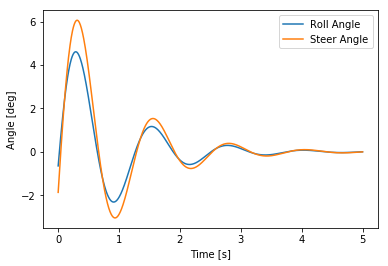

In [13]:
initial = np.real(eigenvectors[:, 1])

times = np.linspace(0, 5, num=1000)

roll_angle, steer_angle = underdamped(eigenvalues[1], initial, times)

plt.figure()
plt.plot(times, np.rad2deg(roll_angle), times, np.rad2deg(steer_angle))
plt.legend(['Roll Angle', 'Steer Angle'])
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]');

initial

array([-0.0114, -0.0327,  0.5808,  0.7887])

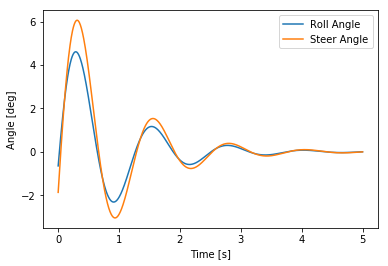

In [14]:
initial = np.real(eigenvectors[:, 2])

times = np.linspace(0, 5, num=1000)

roll_angle, steer_angle = underdamped(eigenvalues[2], initial, times)

plt.figure()
plt.plot(times, np.rad2deg(roll_angle), times, np.rad2deg(steer_angle))
plt.legend(['Roll Angle', 'Steer Angle'])
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]');

initial

# Mode 3: Non-oscillatory

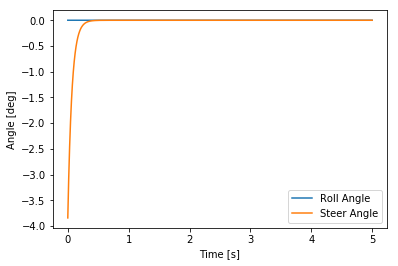

In [15]:
initial = np.real(eigenvectors[:, 3])

times = np.linspace(0, 5, num=1000)

roll_angle, steer_angle = overdamped(eigenvalues[3], initial, times)

plt.figure()
plt.plot(times, np.rad2deg(roll_angle), times, np.rad2deg(steer_angle))
plt.legend(['Roll Angle', 'Steer Angle'])
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]');

# Numerically Integrating

The linear equations of motion can also be integrated with a numerical integration routine. If you provide the eigenvectors as initial conditions you will see only that particular mode's motion.

In [16]:
from scipy.integrate import odeint

initial = np.real(eigenvectors[:, 1])

def rhs(x, t, A):
    """ Returns the derivative of the linear ordinary differential equation."""
    return A @ x

x = odeint(rhs, initial, times, args=(A, ))

In [17]:
def plot_roll_and_steer(times, roll, steer, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    ax.plot(times, np.rad2deg(roll), times, np.rad2deg(steer))
    ax.legend(['Roll Angle', 'Steer Angle'])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Angle [deg]')

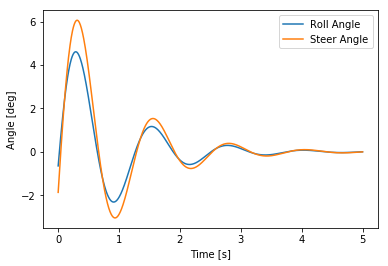

In [18]:
plot_roll_and_steer(times, x[:, 0], x[:, 1])

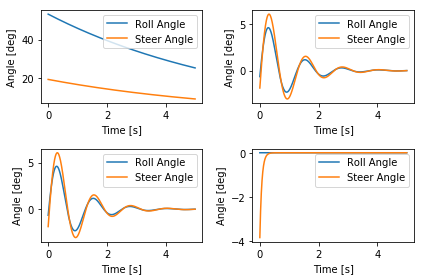

In [19]:
fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    initial = np.real(eigenvectors[:, i])
    x = odeint(rhs, initial, times, args=(A, ))
    plot_roll_and_steer(times, x[:, 0], x[:, 1], ax=ax)
plt.tight_layout()

(-20, 20)

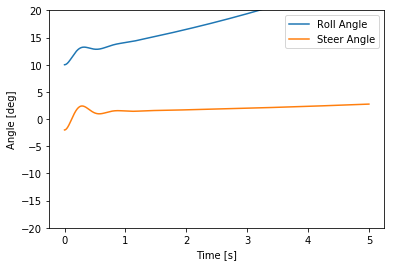

In [20]:
initial = np.deg2rad([10, -2, 0, 0])
A = compute_state_matrix(10, 9.81, M, C1, K0, K2)
x = odeint(rhs, initial, times, args=(A, ))
plot_roll_and_steer(times, x[:, 0], x[:, 1])
plt.ylim([-20, 20])

# Exercise

Plot the real part of the eigenvalues as a function of speed and the imaginary part of the eigenvalues as a function of speed. Explain what you learn about the stability of each mode

In [21]:
speeds = np.linspace(0, 10, num=100)

eigenvalues = np.zeros((len(speeds), 4), dtype=complex)
eigenvectors = np.zeros((len(speeds), 4, 4), dtype=complex)

for i, v in enumerate(speeds):
    A = compute_state_matrix(v, 9.81, M, C1, K0, K2)
    eigenvalues[i], eigenvectors[i] = np.linalg.eig(A)

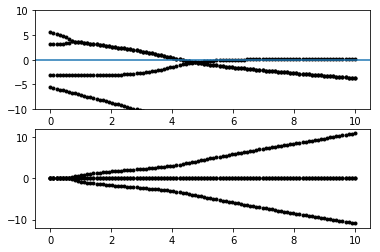

In [22]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(speeds, np.real(eigenvalues), 'k.')
axes[0].axhline(0)
axes[0].set_ylim([-10, 10])
axes[1].plot(speeds, np.imag(eigenvalues), 'k.');


Below is a function that computes the canonical matrices for the bicycle given various geometric and inerital parameters.



![bicycle model figure](fig/bicycle-model.jpg)

![bicycle parameters figure](fig/bicycle-parameters.jpg)

In [23]:
def benchmark_parameters():
    """Returns the benchmark bicycle parameters from [Meijaard2007]_.
    References
    ----------
    .. [Meijaard2007]_ J. P. Meijaard, Jim M. Papadopoulos, Andy Ruina, and A.
       L. Schwab. Linearized dynamics equations for the balance and steer of a
       bicycle: A benchmark and review. Proceedings of the Royal Society A:
       Mathematical, Physical and Engineering Sciences, 463(2084):1955–1982,
       August 2007.
    """

    p = {}

    p['w'] = 1.02
    p['c'] = 0.08
    p['lam'], p['lambda'] = pi / 10., pi / 10.
    p['g'] = 9.81
    p['rR'] = 0.3
    p['mR'] = 2.0
    p['IRxx'] = 0.0603
    p['IRyy'] = 0.12
    p['xB'] = 0.3
    p['zB'] = -0.9
    p['mB'] = 85.0
    p['IBxx'] = 9.2
    p['IByy'] = 11.0
    p['IBzz'] = 2.8
    p['IBxz'] = 2.4
    p['xH'] = 0.9
    p['zH'] = -0.7
    p['mH'] = 4.0
    p['IHxx'] = 0.05892
    p['IHyy'] = 0.06
    p['IHzz'] = 0.00708
    p['IHxz'] = -0.00756
    p['rF'] = 0.35
    p['mF'] = 3.0
    p['IFxx'] = 0.1405
    p['IFyy'] = 0.28

    return p

In [24]:
def benchmark_par_to_canonical(p):
    """
    Returns the canonical matrices of the Whipple bicycle model linearized
    about the upright constant velocity configuration. It uses the parameter
    definitions from [Meijaard2007]_.
    Parameters
    ----------
    p : dictionary
        A dictionary of the benchmark bicycle parameters. Make sure your units
        are correct, best to ue the benchmark paper's units!
    Returns
    -------
    M : ndarray, shape(2,2)
        The mass matrix.
    C1 : ndarray, shape(2,2)
        The damping like matrix that is proportional to the speed, v.
    K0 : ndarray, shape(2,2)
        The stiffness matrix proportional to gravity, g.
    K2 : ndarray, shape(2,2)
        The stiffness matrix proportional to the speed squared, v**2.
    """
    mT = p['mR'] + p['mB'] + p['mH'] + p['mF']
    xT = (p['xB'] * p['mB'] + p['xH'] * p['mH'] + p['w'] * p['mF']) / mT
    zT = (-p['rR'] * p['mR'] + p['zB'] * p['mB'] +
          p['zH'] * p['mH'] - p['rF'] * p['mF']) / mT

    ITxx = (p['IRxx'] + p['IBxx'] + p['IHxx'] + p['IFxx'] + p['mR'] *
            p['rR']**2 + p['mB'] * p['zB']**2 + p['mH'] * p['zH']**2 + p['mF']
            * p['rF']**2)
    ITxz = (p['IBxz'] + p['IHxz'] - p['mB'] * p['xB'] * p['zB'] -
            p['mH'] * p['xH'] * p['zH'] + p['mF'] * p['w'] * p['rF'])
    p['IRzz'] = p['IRxx']
    p['IFzz'] = p['IFxx']
    ITzz = (p['IRzz'] + p['IBzz'] + p['IHzz'] + p['IFzz'] +
            p['mB'] * p['xB']**2 + p['mH'] * p['xH']**2 + p['mF'] * p['w']**2)

    mA = p['mH'] + p['mF']
    xA = (p['xH'] * p['mH'] + p['w'] * p['mF']) / mA
    zA = (p['zH'] * p['mH'] - p['rF'] * p['mF']) / mA

    IAxx = (p['IHxx'] + p['IFxx'] + p['mH'] * (p['zH'] - zA)**2 +
            p['mF'] * (p['rF'] + zA)**2)
    IAxz = (p['IHxz'] - p['mH'] * (p['xH'] - xA) * (p['zH'] - zA) + p['mF'] *
            (p['w'] - xA) * (p['rF'] + zA))
    IAzz = (p['IHzz'] + p['IFzz'] + p['mH'] * (p['xH'] - xA)**2 + p['mF'] *
            (p['w'] - xA)**2)
    uA = (xA - p['w'] - p['c']) * np.cos(p['lam']) - zA * np.sin(p['lam'])
    IAll = (mA * uA**2 + IAxx * np.sin(p['lam'])**2 +
            2 * IAxz * np.sin(p['lam']) * np.cos(p['lam']) +
            IAzz * np.cos(p['lam'])**2)
    IAlx = (-mA * uA * zA + IAxx * np.sin(p['lam']) + IAxz *
            np.cos(p['lam']))
    IAlz = (mA * uA * xA + IAxz * np.sin(p['lam']) + IAzz *
            np.cos(p['lam']))

    mu = p['c'] / p['w'] * np.cos(p['lam'])

    SR = p['IRyy'] / p['rR']
    SF = p['IFyy'] / p['rF']
    ST = SR + SF
    SA = mA * uA + mu * mT * xT

    Mpp = ITxx
    Mpd = IAlx + mu * ITxz
    Mdp = Mpd
    Mdd = IAll + 2 * mu * IAlz + mu**2 * ITzz
    M = np.array([[Mpp, Mpd], [Mdp, Mdd]])

    K0pp = mT * zT  # this value only reports to 13 digit precision it seems?
    K0pd = -SA
    K0dp = K0pd
    K0dd = -SA * np.sin(p['lam'])
    K0 = np.array([[K0pp, K0pd], [K0dp, K0dd]])

    K2pp = 0.
    K2pd = (ST - mT * zT) / p['w'] * np.cos(p['lam'])
    K2dp = 0.
    K2dd = (SA + SF * np.sin(p['lam'])) / p['w'] * np.cos(p['lam'])
    K2 = np.array([[K2pp, K2pd], [K2dp, K2dd]])

    C1pp = 0.
    C1pd = (mu * ST + SF * np.cos(p['lam']) + ITxz / p['w'] *
            cos(p['lam']) - mu*mT*zT)
    C1dp = -(mu * ST + SF * np.cos(p['lam']))
    C1dd = (IAlz / p['w'] * np.cos(p['lam']) + mu * (SA +
            ITzz / p['w'] * np.cos(p['lam'])))
    C1 = np.array([[C1pp, C1pd], [C1dp, C1dd]])

    return M, C1, K0, K2

# Exercises

1. Remove the gyro effect of the wheels from your model by setting $I_{zz}$ to zero for both wheels. Is your bicycle still stable in some speed range?

2. Reverse the trail, $c$, (make negative). Is your bicycle still stable in some speed range?

3. Keep the gyro effect and the positive trail but change the mass distribution of the front fork such that the bicycle is always unstable.

4. Make a design with negative trail which still shows some stable speed range.